In [2]:
import pandas as pd

export_df = pd.read_csv('export.csv')

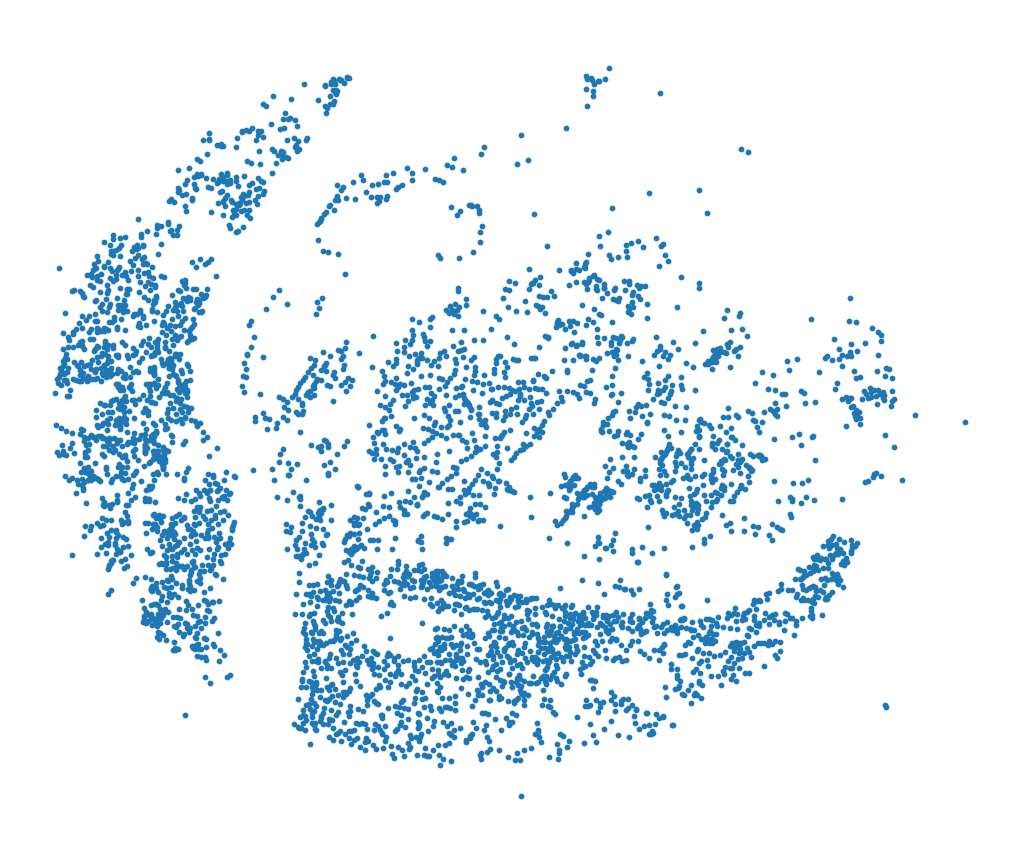

In [3]:
import networkx as nx

import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges using centroid coordinates as nodes
for _, row in df.iterrows():
    if not (pd.isnull(row['centroid_lon']) or pd.isnull(row['centroid_lat'])):
        node = (row['centroid_lon'], row['centroid_lat'])
        G.add_node(node, highway=row['highway'], name=row['name'])
        # Optionally, connect consecutive nodes if you have geometry data

# Draw the network
plt.figure(figsize=(10, 8))
pos = {node: node for node in G.nodes()}
nx.draw(G, pos, node_size=10, with_labels=False, edge_color='gray')
plt.title('Roadway Network')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [4]:
print(list(G.edges()))

[]


In [9]:
osm_file = "./map (2).osm"
if os.path.exists(osm_file):
    osm_handler.apply_file(osm_file)
else:
    print(f"File '{osm_file}' not found. Please check the file path.")


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\souri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


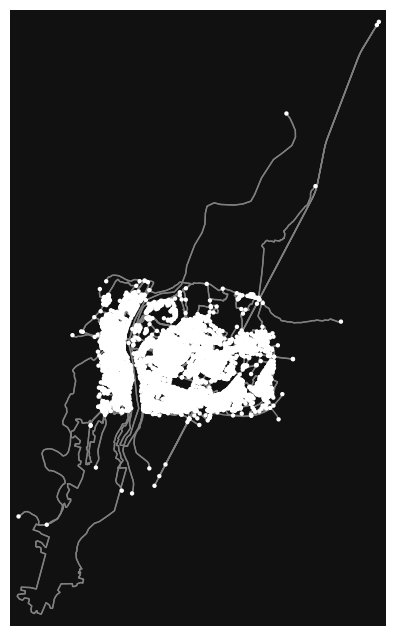

In [12]:
%pip install osmnx

import osmnx as ox

# Plot the OSM file using osmnx
if os.path.exists(osm_file):
    graph = ox.graph_from_xml(osm_file)
    fig, ax = ox.plot_graph(graph, figsize=(10, 8), node_size=10, edge_color='gray')
else:
    print(f"File '{osm_file}' not found. Please check the file path.")

In [13]:
from IPython.display import display

display(df)


,@id,area,highway,name,centroid_lon,centroid_lat,source,bridge,layer,oneway,...,lit,railway,description,segregated,construction,maxspeed:advisory,minspeed,overtaking,sidewalk,check_date
0,way/1017270121,yes,services,Administrative Area,88.448045,22.977433,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way/44370899,NaN,trunk,Kalyani-Barrackpur expressway,88.400438,22.966458,Yahoo hires,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way/44370909,NaN,trunk,Ishwar Gupta Setu,88.408509,22.967459,Yahoo hires,yes,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way/44370932,NaN,trunk,NaN,88.417361,22.967120,Yahoo hires,NaN,NaN,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way/44371015,NaN,trunk,Kalyani-Barrackpur expressway,88.395375,22.966048,Yahoo hires,yes,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,way/1353676545,NaN,motorway,NaN,88.457755,22.934787,NaN,NaN,NaN,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4584,way/1357822794,NaN,tertiary,NaN,88.439388,22.940332,Yahoo hires,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4585,way/1357822795,NaN,tertiary,NaN,88.435903,22.942644,Yahoo hires,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4586,way/1368330574,NaN,residential,NaN,88.443817,22.989873,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


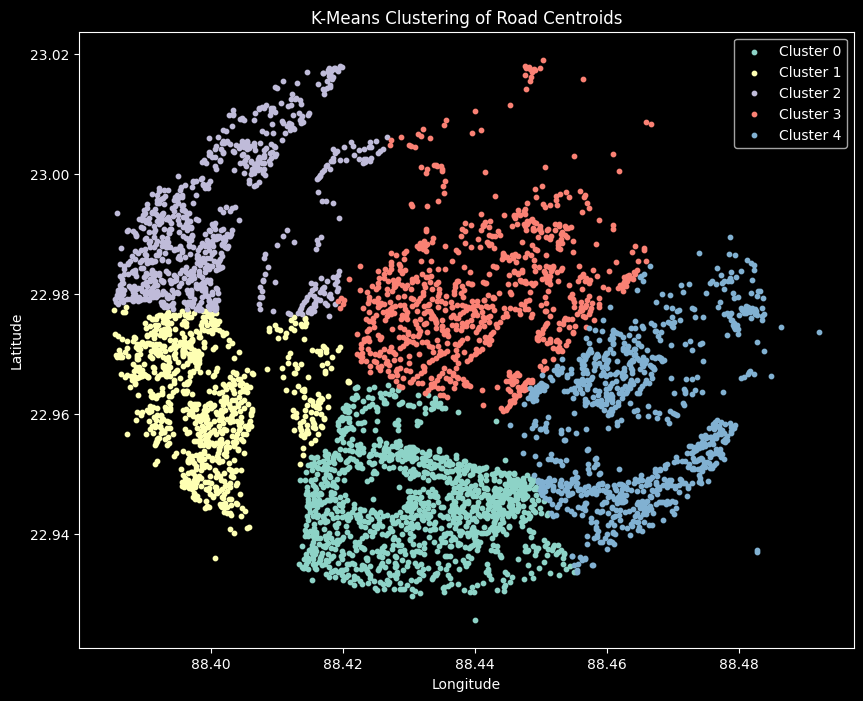

In [14]:
from sklearn.cluster import KMeans

# Select centroid coordinates for clustering
coords = df[['centroid_lon', 'centroid_lat']].values

# Choose number of clusters (e.g., 5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
df['cluster'] = kmeans.fit_predict(coords)

# Plot clusters
plt.figure(figsize=(10, 8))
for i in range(k):
    cluster_points = df[df['cluster'] == i]
    plt.scatter(cluster_points['centroid_lon'], cluster_points['centroid_lat'], label=f'Cluster {i}', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of Road Centroids')
plt.legend()
plt.show()

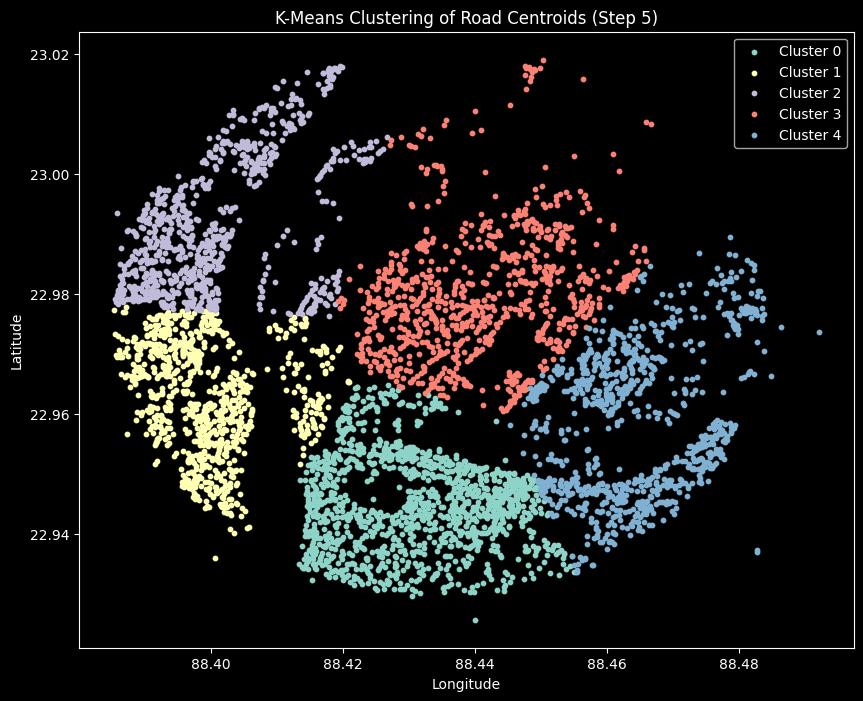

KeyboardInterrupt: 

In [15]:
import time
from IPython.display import clear_output

for step in range(5):  # Run 5 updates as an example
    # Add an edge with a timestamp attribute
    G.add_edge((88.4, 22.9), (88.5, 22.95), timestamp=time.strftime('%Y-%m-%dT%H:%M:%S'))

    # Clear previous output and plot clusters
    clear_output(wait=True)
    plt.figure(figsize=(10, 8))
    for i in range(k):
        cluster_points = df[df['cluster'] == i]
        plt.scatter(cluster_points['centroid_lon'], cluster_points['centroid_lat'], label=f'Cluster {i}', s=10)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'K-Means Clustering of Road Centroids (Step {step+1})')
    plt.legend()
    plt.show()

    # Remove the edge to simulate dynamic update
    G.remove_edge((88.4, 22.9), (88.5, 22.95))

    time.sleep(10)

In [16]:
# Draw the full graph (with edges) after clustering, in 8K resolution and save to local path

fig8k, ax8k = plt.subplots(figsize=(80, 60), dpi=100)  # 8K: 7680x4320 pixels

# Draw nodes colored by cluster
for i in range(k):
    cluster_points = df[df['cluster'] == i]
    ax8k.scatter(cluster_points['centroid_lon'], cluster_points['centroid_lat'], label=f'Cluster {i}', s=20)

# Draw edges
nx.draw_networkx_edges(G, pos, ax=ax8k, edge_color='gray', alpha=0.5)

ax8k.set_xlabel('Longitude')
ax8k.set_ylabel('Latitude')
ax8k.set_title('Roadway Network with Clusters (8K Resolution)')
ax8k.legend()

output_path = "roadway_network_8k.png"
fig8k.savefig(output_path, dpi=100)
plt.close(fig8k)

print(f"Graph image saved to {output_path}")

Graph image saved to roadway_network_8k.png


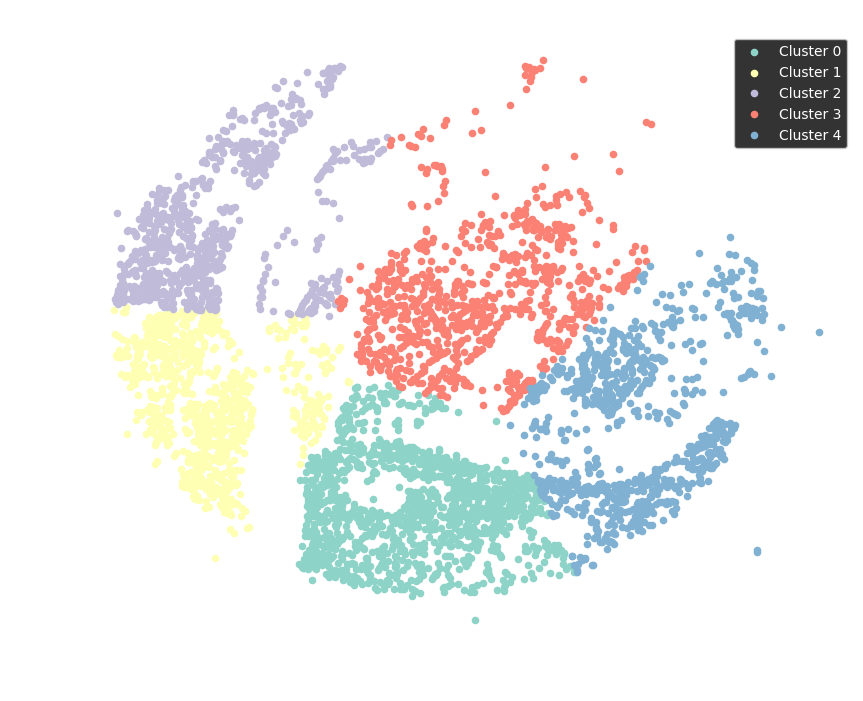

In [17]:
# Redraw the full graph with a white background and more visible edges

fig_white, ax_white = plt.subplots(figsize=(10, 8), facecolor='white')
ax_white.set_facecolor('white')

# Draw nodes colored by cluster
for i in range(k):
    cluster_points = df[df['cluster'] == i]
    ax_white.scatter(cluster_points['centroid_lon'], cluster_points['centroid_lat'], label=f'Cluster {i}', s=20)

# Draw edges with increased width and darker color for visibility
nx.draw_networkx_edges(G, pos, ax=ax_white, edge_color='black', width=1.5, alpha=0.7)

ax_white.set_xlabel('Longitude')
ax_white.set_ylabel('Latitude')
ax_white.set_title('Roadway Network with Clusters (White Background)')
ax_white.legend()
plt.show()

In [ ]:
import matplotlib.image as mpimg

# Load the background image
img = mpimg.imread('./image.png')

# Plot the image as background
fig_overlay, ax_overlay = plt.subplots(figsize=(10, 8))
ax_overlay.imshow(img, extent=[df['centroid_lon'].min(), df['centroid_lon'].max(),
                               df['centroid_lat'].min(), df['centroid_lat'].max()],
                  aspect='auto', alpha=0.7)

# Overlay the network nodes
for i in range(k):
    cluster_points = df[df['cluster'] == i]
    ax_overlay.scatter(cluster_points['centroid_lon'], cluster_points['centroid_lat'], label=f'Cluster {i}', s=20)

# Overlay the network edges
nx.draw_networkx_edges(G, pos, ax=ax_overlay, edge_color='black', width=1.5, alpha=0.7)

ax_overlay.set_xlabel('Longitude')
ax_overlay.set_ylabel('Latitude')
ax_overlay.set_title('Roadway Network Overlay on Image')
ax_overlay.legend()
plt.show()